<a href="https://colab.research.google.com/github/aksh0605/AJ-Codes/blob/main/pycaret_AML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 71.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 54.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 18.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 50.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 10.6 MB

In [ ]:
from pycaret.datasets import get_data

In [ ]:
dataset=get_data('diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [ ]:
dataset.shape

(6000, 8)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Carat Weight  6000 non-null   float64
 1   Cut           6000 non-null   object 
 2   Color         6000 non-null   object 
 3   Clarity       6000 non-null   object 
 4   Polish        6000 non-null   object 
 5   Symmetry      6000 non-null   object 
 6   Report        6000 non-null   object 
 7   Price         6000 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 375.1+ KB


In [ ]:
data=dataset.sample(frac=0.9,random_state=786)
data

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
5333,1.50,Good,E,VS2,VG,G,GIA,12702
3749,1.08,Ideal,D,VS2,EX,EX,GIA,8481
2376,2.25,Good,I,VS2,G,VG,GIA,18623
3756,2.27,Very Good,G,VS2,VG,VG,GIA,27252
4248,1.20,Ideal,F,VS1,EX,EX,GIA,9641
...,...,...,...,...,...,...,...,...
1248,0.80,Ideal,E,VS1,VG,VG,GIA,3714
5299,1.02,Very Good,E,SI1,VG,EX,GIA,5424
4979,1.03,Ideal,F,VS2,VG,VG,GIA,6997
933,2.01,Good,H,VS1,VG,VG,GIA,18988


In [ ]:
data_unseen=dataset.drop(data.index)

In [ ]:
data.shape, data_unseen.shape

((5400, 8), (600, 8))

In [ ]:
data.reset_index(drop=True, inplace=True)

In [ ]:
data

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.50,Good,E,VS2,VG,G,GIA,12702
1,1.08,Ideal,D,VS2,EX,EX,GIA,8481
2,2.25,Good,I,VS2,G,VG,GIA,18623
3,2.27,Very Good,G,VS2,VG,VG,GIA,27252
4,1.20,Ideal,F,VS1,EX,EX,GIA,9641
...,...,...,...,...,...,...,...,...
5395,0.80,Ideal,E,VS1,VG,VG,GIA,3714
5396,1.02,Very Good,E,SI1,VG,EX,GIA,5424
5397,1.03,Ideal,F,VS2,VG,VG,GIA,6997
5398,2.01,Good,H,VS1,VG,VG,GIA,18988


In [ ]:
data_unseen.reset_index(drop=True, inplace=True)

In [ ]:
data_unseen

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.53,Ideal,E,SI1,ID,ID,AGSL,12791
1,1.50,Fair,F,SI1,VG,VG,GIA,10450
2,1.01,Good,E,SI1,G,G,GIA,5161
3,2.51,Very Good,G,VS2,VG,VG,GIA,34361
4,1.01,Good,I,SI1,VG,VG,GIA,4238
...,...,...,...,...,...,...,...,...
595,1.02,Very Good,F,SI1,G,G,GIA,5430
596,2.05,Good,G,VS1,G,VG,GIA,26297
597,2.01,Very Good,E,VS2,EX,VG,GIA,27002
598,1.03,Ideal,D,SI1,EX,EX,GIA,6250


In [ ]:
from pycaret.regression import *

In [ ]:
s = setup(data=data, target='Price', session_id=120)

,Description,Value
0,Session id,120
1,Target,Price
2,Target type,Regression
3,Original data shape,"(5400, 8)"
4,Transformed data shape,"(5400, 29)"
5,Transformed train set shape,"(3779, 29)"
6,Transformed test set shape,"(1621, 29)"
7,Ordinal features,1
8,Numeric features,1
9,Categorical features,6


In [ ]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,631.0683,2086682.3179,1387.9761,0.9809,0.0659,0.0485,1.0240
xgboost,Extreme Gradient Boosting,709.5500,2351193.0544,1499.5510,0.9779,0.0738,0.0547,0.1630
et,Extra Trees Regressor,747.2886,2571496.4311,1562.8326,0.9760,0.0797,0.0595,0.8720
rf,Random Forest Regressor,782.0623,3341760.9794,1770.0362,0.9689,0.0822,0.0599,0.7920
lightgbm,Light Gradient Boosting Machine,780.6202,3467603.1710,1813.4399,0.9675,0.0793,0.0573,0.8150
gbr,Gradient Boosting Regressor,932.6131,3597009.9721,1849.7796,0.9665,0.1033,0.0780,0.2800
dt,Decision Tree Regressor,1008.8410,5640938.7079,2302.4455,0.9477,0.1076,0.0778,0.1090
ridge,Ridge Regression,2453.7811,14402529.3683,3782.1961,0.8622,0.6537,0.2899,0.1870
lasso,Lasso Regression,2449.6051,14417991.3203,3784.5581,0.8619,0.6564,0.2889,0.2890
llar,Lasso Least Angle Regression,2449.6246,14417986.8324,3784.5571,0.8619,0.6565,0.2889,0.1910


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [ ]:
best = compare_models(sort='MAE', fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,640.1677,2231401.0825,1474.1227,0.9788,0.0668,0.0492,1.0720
xgboost,Extreme Gradient Boosting,736.3041,2738369.3352,1644.9787,0.9740,0.0746,0.0557,0.1640
et,Extra Trees Regressor,765.8717,2861863.2131,1667.6388,0.9729,0.0815,0.0607,0.8920
rf,Random Forest Regressor,788.2850,3387016.7535,1826.6682,0.9678,0.0827,0.0606,0.6680
lightgbm,Light Gradient Boosting Machine,791.4449,3547003.2204,1876.5615,0.9661,0.0798,0.0579,1.1480
gbr,Gradient Boosting Regressor,933.4872,3689604.4561,1910.7721,0.9648,0.1032,0.0778,0.2880
dt,Decision Tree Regressor,1045.1252,6175324.5020,2460.4008,0.9411,0.1115,0.0799,0.1180
huber,Huber Regressor,1960.7493,19181346.8262,4373.0512,0.8169,0.4172,0.1663,0.1500
par,Passive Aggressive Regressor,1975.2474,21224348.0758,4596.8484,0.7976,0.4368,0.1589,0.1240
lasso,Lasso Regression,2439.9071,14194812.6609,3766.2221,0.8641,0.6473,0.2881,0.1320


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [ ]:
best = compare_models(sort='R2', fold=5,n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,640.1677,2231401.0825,1474.1227,0.9788,0.0668,0.0492,1.0560
xgboost,Extreme Gradient Boosting,736.3041,2738369.3352,1644.9787,0.9740,0.0746,0.0557,0.1600
et,Extra Trees Regressor,765.8717,2861863.2131,1667.6388,0.9729,0.0815,0.0607,0.8780
rf,Random Forest Regressor,788.2850,3387016.7535,1826.6682,0.9678,0.0827,0.0606,0.6640
lightgbm,Light Gradient Boosting Machine,791.4449,3547003.2204,1876.5615,0.9661,0.0798,0.0579,0.4860
gbr,Gradient Boosting Regressor,933.4872,3689604.4561,1910.7721,0.9648,0.1032,0.0778,0.2820
dt,Decision Tree Regressor,1045.1252,6175324.5020,2460.4008,0.9411,0.1115,0.0799,0.1140
lasso,Lasso Regression,2439.9071,14194812.6609,3766.2221,0.8641,0.6473,0.2881,0.1320
llar,Lasso Least Angle Regression,2439.9273,14194812.7252,3766.2221,0.8641,0.6472,0.2881,0.1260
br,Bayesian Ridge,2443.1779,14197469.1921,3766.4920,0.8641,0.6423,0.2888,0.1120


Processing:   0%|          | 0/87 [00:00<?, ?it/s]

In [ ]:
final_model = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,769.0197,5019799.6744,2240.4909,0.9610,0.0699,0.0495
1,479.6713,680732.1315,825.0649,0.9920,0.0583,0.0442
2,661.0828,3300227.7196,1816.6529,0.9713,0.0665,0.0486
3,621.5497,1581105.7638,1257.4203,0.9831,0.0649,0.0486
4,586.9820,1276817.3463,1129.9634,0.9875,0.0649,0.0471
5,600.8674,1226730.8225,1107.5788,0.9848,0.0645,0.0488
6,669.9392,3125183.6796,1767.8189,0.9719,0.0685,0.0502
7,641.1980,1451583.2540,1204.8167,0.9862,0.0661,0.0486
8,651.2621,1484887.7976,1218.5597,0.9852,0.0688,0.0497


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
print(final_model)

In [ ]:
tuned_final_model = tune_model(final_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,829.9906,5416559.9540,2327.3504,0.9579,0.0752,0.0549
1,559.5229,979043.7824,989.4664,0.9885,0.0686,0.0511
2,736.9177,3348705.2736,1829.9468,0.9709,0.0744,0.0548
3,697.1906,1652121.2470,1285.3487,0.9824,0.0734,0.0549
4,640.2832,1360695.6156,1166.4886,0.9867,0.0726,0.0527
5,685.6161,1727791.8646,1314.4550,0.9786,0.0742,0.0562
6,695.0807,2801454.3553,1673.7546,0.9748,0.0748,0.0548
7,714.8391,1585363.4758,1259.1122,0.9850,0.0749,0.0564
8,680.9061,1899099.1503,1378.0781,0.9811,0.0727,0.0527


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


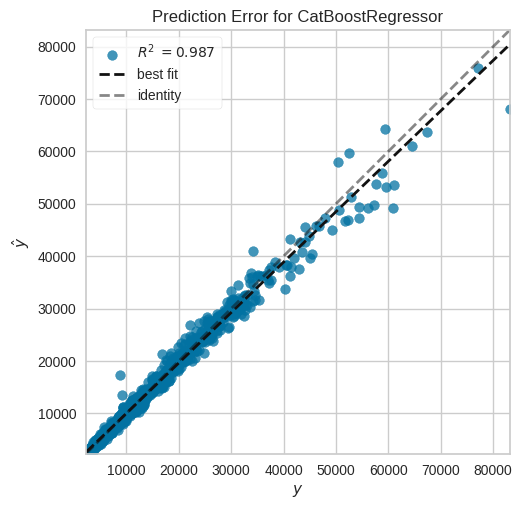

In [ ]:
plot_model(final_model, plot='error')

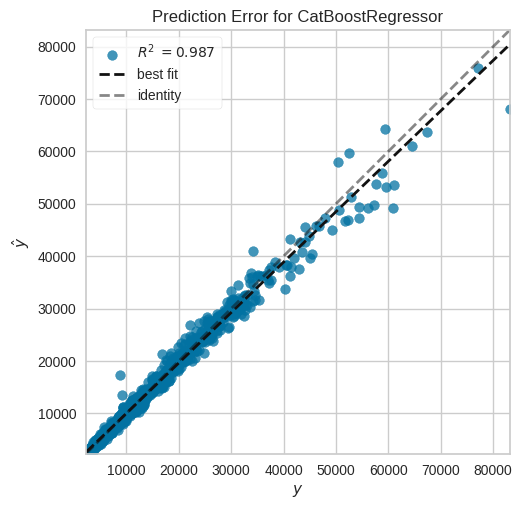

In [ ]:
plot_model(tuned_final_model, plot='error')

In [ ]:
predict_model(final_model, data=data_unseen)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,660.1874,1756630.5809,1325.3794,0.9829,0.0644,0.0485


,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,prediction_label
0,1.53,Ideal,E,SI1,ID,ID,AGSL,12791,11976.279475
1,1.50,Fair,F,SI1,VG,VG,GIA,10450,10283.060173
2,1.01,Good,E,SI1,G,G,GIA,5161,5146.183775
3,2.51,Very Good,G,VS2,VG,VG,GIA,34361,33369.244071
4,1.01,Good,I,SI1,VG,VG,GIA,4238,4108.077030
...,...,...,...,...,...,...,...,...,...
595,1.02,Very Good,F,SI1,G,G,GIA,5430,5117.308622
596,2.05,Good,G,VS1,G,VG,GIA,26297,25654.846999
597,2.01,Very Good,E,VS2,EX,VG,GIA,27002,27784.248984
598,1.03,Ideal,D,SI1,EX,EX,GIA,6250,6440.888948


In [ ]:
predict_model(tuned_final_model, data=data_unseen)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,660.1874,1756630.5809,1325.3794,0.9829,0.0644,0.0485


,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,prediction_label
0,1.53,Ideal,E,SI1,ID,ID,AGSL,12791,11976.279475
1,1.50,Fair,F,SI1,VG,VG,GIA,10450,10283.060173
2,1.01,Good,E,SI1,G,G,GIA,5161,5146.183775
3,2.51,Very Good,G,VS2,VG,VG,GIA,34361,33369.244071
4,1.01,Good,I,SI1,VG,VG,GIA,4238,4108.077030
...,...,...,...,...,...,...,...,...,...
595,1.02,Very Good,F,SI1,G,G,GIA,5430,5117.308622
596,2.05,Good,G,VS1,G,VG,GIA,26297,25654.846999
597,2.01,Very Good,E,VS2,EX,VG,GIA,27002,27784.248984
598,1.03,Ideal,D,SI1,EX,EX,GIA,6250,6440.888948


In [ ]:
predict_model(tuned_final_model)
predict_model(final_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,574.1356,1300362.6994,1140.3345,0.9872,0.0643,0.0471


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,574.1356,1300362.6994,1140.3345,0.9872,0.0643,0.0471


,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,prediction_label
3088,1.30,Ideal,G,VVS2,VG,VG,GIA,11853,11370.919568
1194,2.21,Ideal,G,VS2,EX,EX,GIA,30440,28398.197879
883,1.06,Ideal,G,VS2,EX,EX,GIA,6890,7114.261924
329,0.90,Fair,D,VS2,VG,VG,GIA,4277,4888.981490
4428,2.01,Ideal,E,SI1,EX,EX,GIA,23217,22381.047807
...,...,...,...,...,...,...,...,...,...
548,1.01,Fair,G,SI1,VG,G,GIA,4646,4539.530933
1440,1.12,Very Good,E,SI1,VG,VG,GIA,5558,5914.770493
989,0.82,Ideal,F,SI1,EX,EX,GIA,3596,3581.423624
4836,1.50,Ideal,D,VS2,ID,ID,AGSL,15996,15986.545911


In [ ]:
production_model=finalize_model(final_model)

In [ ]:
production_model

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Carat Weight'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['Cut', 'Color', 'Clarity',
                                             'Polish', 'Symmetry', 'Report'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_encoding',
                 TransformerWrapper(include=['Rep...
                 TransformerWrapper(include=['Cut', 'Color', 'Clarity',
                                             'Polish', 'Symmetry'],
                                    transformer=OneHotEncoder(cols=['Cut',
                                                                    'Color',
                                                                    'Clarity',
                                                                    'Polish',
                                                                    'Symmetry'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('actual_estimator',
                 <catboost.core.CatBoostRegressor object at 0x7e96d16037c0>)])

In [ ]:
unseen_predictions=predict_model(production_model, data=data_unseen)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,657.2588,1532469.9856,1237.9297,0.9851,0.0639,0.0484


In [ ]:
unseen_predictions.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,prediction_label
0,1.53,Ideal,E,SI1,ID,ID,AGSL,12791,12420.631219
1,1.50,Fair,F,SI1,VG,VG,GIA,10450,10398.620624
2,1.01,Good,E,SI1,G,G,GIA,5161,5117.841413
3,2.51,Very Good,G,VS2,VG,VG,GIA,34361,34816.885137
4,1.01,Good,I,SI1,VG,VG,GIA,4238,4138.315710


In [ ]:
from pycaret.utils.generic import check_metric

In [ ]:
save_model(production_model,'Production_model_completed_by_AKSHAY')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Carat Weight'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Cut', 'Color', 'Clarity',
                                              'Polish', 'Symmetry', 'Report'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['Rep...
                  TransformerWrapper(include=['Cut', 'Color', 'Clarity',
                                              'Polish', 'Symmetry'],
                                     transformer=OneHotEncoder(cols=['Cut',
                                                                     'Color',
                                                                     'Clarity',
                                     

In [ ]:
saved_retrieve=load_model('/content/Production_model_completed_by_AKSHAY')

Transformation Pipeline and Model Successfully Loaded


In [ ]:
new_prediction=predict_model(saved_retrieve, data=data_unseen)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,657.2588,1532469.9856,1237.9297,0.9851,0.0639,0.0484


In [ ]:
new_prediction.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,prediction_label
0,1.53,Ideal,E,SI1,ID,ID,AGSL,12791,12420.631219
1,1.50,Fair,F,SI1,VG,VG,GIA,10450,10398.620624
2,1.01,Good,E,SI1,G,G,GIA,5161,5117.841413
3,2.51,Very Good,G,VS2,VG,VG,GIA,34361,34816.885137
4,1.01,Good,I,SI1,VG,VG,GIA,4238,4138.315710
